# Weather Sensor Data from Lavaux 2022-03-08

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

## Import all csv files 
readout from HOBO sensors (2022-03-08)

In [5]:
!pwd

/Users/lfloerl/Desktop/MICROTERROIR/Sensor Data


In [4]:
all_files = glob.glob("Lavaux_*.csv")
len(all_files) # should be 23 

0

In [3]:
names = []
names = [x.split('.')[0] for x in all_files]

### Import all temperature and RH data into one dataframe

In [75]:
# read in all csv files as a list of dataframes, only use the first 3 columns and set the date as index 
dfs = [pd.read_csv(f, skiprows=1, usecols=[1,2,3], index_col=0) for f in all_files]

#rename the columns of all dataframes 
for df in dfs:
    df.rename_axis('Date', inplace=True)
    df.columns = ['Temp','RH']

# concatenate all dataframes and pass names of the sensors - ONE dataframe with temp & RH 
df = pd.concat(dfs, axis=1, keys=names)

# set the time frame
df.index = pd.to_datetime(df.index)
df = df[(df.index > '2021-05-10 07:30:00') & (df.index < '2022-03-08 09:00:00')]

df.head()

Lavaux_003         Lavaux_017         Lavaux_016          \
                          Temp      RH       Temp      RH       Temp      RH   
Date                                                                           
2021-05-10 07:45:00     16.939  65.523        NaN     NaN        NaN     NaN   
2021-05-10 08:00:00     16.582  66.635     15.461  72.415     16.177  70.573   
2021-05-10 08:15:00     16.034  70.805        NaN     NaN        NaN     NaN   
2021-05-10 08:30:00     15.891  70.403        NaN     NaN        NaN     NaN   
2021-05-10 08:45:00     15.390  76.396        NaN     NaN        NaN     NaN   

                    Lavaux_002        Lavaux_028         ... Lavaux_018  \
                          Temp     RH       Temp     RH  ...       Temp   
Date                                                     ...              
2021-05-10 07:45:00        NaN    NaN        NaN    NaN  ...        NaN   
2021-05-10 08:00:00     16.892  67.54     16.749  69.32  ...     16.844   
2021-05-10 08:15:00        NaN    NaN        NaN    NaN  ...        NaN   
2021-05-10 08:30:00        NaN    NaN        NaN    NaN  ...        NaN   
2021-05-10 08:45:00        NaN    NaN        NaN    NaN  ...        NaN   

                            Lavaux_019         Lavaux_025         Lavaux_032  \
                         RH       Temp      RH       Temp      RH       Temp   
Date                                                                           
2021-05-10 07:45:00     NaN        NaN     NaN        NaN     NaN        NaN   
2021-05-10 08:00:00  65.388     16.892  67.686     15.605  69.888     15.294   
2021-05-10 08:15:00     NaN        NaN     NaN        NaN     NaN        NaN   
2021-05-10 08:30:00     NaN        NaN     NaN        NaN     NaN        NaN   
2021-05-10 08:45:00     NaN        NaN     NaN        NaN     NaN        NaN   

                            Lavaux_026         
                         RH       Temp     RH  
Date                                           
2021-05-10 07:45:00     NaN        NaN    NaN  
2021-05-10 08:00:00  73.863     15.485  72.02  
2021-05-10 08:15:00     NaN        NaN    NaN  
2021-05-10 08:30:00     NaN        NaN    NaN  
2021-05-10 08:45:00     NaN        NaN    NaN  

[5 rows x 46 columns]

In [83]:
# Get a Temperature Dataframe 
df_temp = df.iloc[:, df.columns.get_level_values(1)=='Temp']
df_temp.describe()

,Lavaux_003,Lavaux_017,Lavaux_016,Lavaux_002,Lavaux_028,Lavaux_001,Lavaux_015,Lavaux_029,Lavaux_004,Lavaux_006,...,Lavaux_009,Lavaux_020,Lavaux_008,Lavaux_030,Lavaux_024,Lavaux_018,Lavaux_019,Lavaux_025,Lavaux_032,Lavaux_026
,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,...,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp
count,19039.000000,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000,...,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000
mean,16.294227,11.613395,12.102641,12.642954,12.591821,11.713881,12.611477,12.215067,11.847842,12.200497,...,12.644463,11.532498,11.743041,12.415682,11.922242,12.104432,12.592529,11.630705,11.458290,11.712755
std,6.201276,8.158508,7.918259,7.823861,7.688225,8.196413,7.831914,7.825257,7.863548,7.805886,...,7.747180,8.071965,8.175272,7.956037,8.096874,7.714763,7.698094,8.067101,7.972676,8.234610
min,2.155000,-5.760000,-3.094000,-2.276000,-2.334000,-4.834000,-2.392000,-2.918000,-3.508000,-2.683000,...,-2.218000,-5.791000,-5.636000,-2.976000,-3.836000,-2.771000,-2.450000,-5.667000,-4.227000,-5.729000
25%,11.613000,4.662000,5.308000,5.898000,5.898000,4.714000,5.847000,5.385000,5.076000,5.385000,...,6.000000,4.610000,4.610000,5.539000,4.999000,5.360000,5.898000,4.714000,4.584000,4.662000
50%,16.415000,11.224000,11.710000,12.001000,12.074000,11.175000,12.025000,11.759000,11.419000,11.710000,...,12.098000,11.200000,11.807000,11.904000,11.394000,11.662000,12.098000,11.127000,11.053000,11.200000
75%,20.531000,17.558000,18.033000,18.580000,18.604000,17.605000,18.509000,18.176000,17.748000,18.271000,...,18.461000,17.534000,17.891000,18.485000,17.724000,18.129000,18.557000,17.605000,17.415000,17.677000
max,34.360000,34.124000,34.492000,36.308000,32.949000,33.053000,34.916000,32.717000,33.235000,31.944000,...,33.992000,33.600000,32.949000,34.308000,35.395000,38.672000,33.235000,33.443000,32.691000,33.626000


### Let's check out Temperatures in August! 

In [112]:
## compare temperature in August ?
df_Aug = df_temp[(df_temp.index > '2021-08-01 07:30:00') & (df_temp.index < '2021-08-31 23:00:00')]
df_Aug.describe()

,Lavaux_003,Lavaux_017,Lavaux_016,Lavaux_002,Lavaux_028,Lavaux_001,Lavaux_015,Lavaux_029,Lavaux_004,Lavaux_006,...,Lavaux_009,Lavaux_020,Lavaux_008,Lavaux_030,Lavaux_024,Lavaux_018,Lavaux_019,Lavaux_025,Lavaux_032,Lavaux_026
,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,...,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp
count,2941.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,...,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,20.048269,19.613268,19.916333,20.373065,20.359631,19.579072,20.437001,19.958699,19.634849,19.966216,...,20.476054,19.484099,19.624652,20.294450,19.879707,19.838235,20.434966,19.589796,19.265144,19.808509
std,4.744092,5.103099,4.763636,4.446200,4.255977,4.930121,4.486280,4.523610,4.610926,4.331416,...,4.585166,4.852087,4.897865,4.754511,5.249680,4.374313,4.308164,4.780418,4.781623,5.078140
min,11.929000,11.127000,12.340000,12.920000,13.209000,10.785000,12.992000,12.461000,11.904000,12.582000,...,12.775000,11.273000,11.370000,12.292000,11.394000,12.630000,13.088000,11.637000,11.492000,11.297000
25%,16.034000,15.390000,15.963000,16.677500,16.820000,15.473000,16.772500,16.082000,15.664000,16.308000,...,16.701500,15.449500,15.449500,16.093500,15.557000,16.153000,16.701000,15.509000,15.175000,15.485000
50%,19.222000,18.771000,19.103000,19.817000,19.936000,18.818000,19.912000,19.246000,19.008000,19.436000,...,19.841000,18.818000,18.937000,19.651000,18.818000,19.318000,20.103000,18.889000,18.509000,19.270000
75%,23.448000,23.256000,23.496500,23.545000,23.232000,23.316000,23.581000,23.244000,22.848000,23.040000,...,23.773000,23.016000,23.160000,23.930000,23.605000,22.741000,23.773000,23.040000,22.693000,23.605000
max,34.360000,34.124000,34.492000,33.079000,32.949000,32.175000,33.861000,32.717000,33.131000,31.944000,...,33.992000,33.600000,32.949000,34.308000,35.395000,33.157000,33.235000,33.443000,32.691000,33.626000


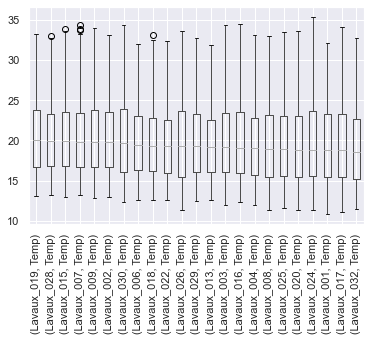

In [139]:
meds = df_Aug.median()
meds.sort_values(ascending=False, inplace=True)
df_Aug = df_Aug[meds.index]
df_Aug.boxplot()

plt.xticks(rotation=90)

plt.show()


In [ ]:

trainData = pd.read_csv('titanic.csv')
testPlot = sns.boxplot(x='pclass', y='age', hue='sex', data=trainData)
m1 = trainData.groupby(['pclass', 'sex'])['age'].median().values
mL1 = [str(np.round(s, 2)) for s in m1]

ind = 0
for tick in range(len(testPlot.get_xticklabels())):
    testPlot.text(tick-.2, m1[ind+1]+1, mL1[ind+1],  horizontalalignment='center',  color='w', weight='semibold')
    testPlot.text(tick+.2, m1[ind]+1, mL1[ind], horizontalalignment='center', color='w', weight='semibold')
    ind += 2    
plt.show()

IndexError: index 23 is out of bounds for axis 0 with size 23

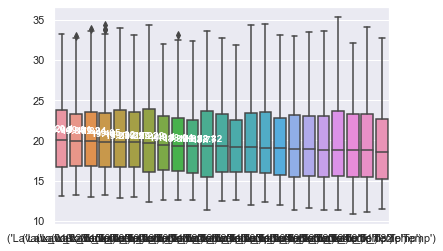

In [142]:
trainData = df_Aug
testPlot = sns.boxplot(data=trainData)
m1 = df_Aug.median()
mL1 = [str(np.round(s, 2)) for s in m1]

ind = 0
for tick in range(len(testPlot.get_xticklabels())):
    testPlot.text(tick-.2, m1[ind+1]+1, mL1[ind+1],  horizontalalignment='center',  color='w', weight='semibold')
    testPlot.text(tick+.2, m1[ind]+1, mL1[ind], horizontalalignment='center', color='w', weight='semibold')
    ind += 2    
plt.show()

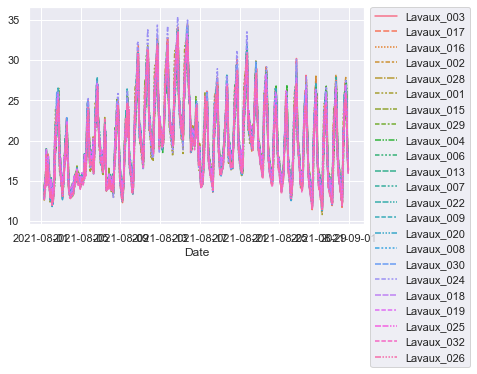

In [107]:
sns.lineplot(data=df_Aug)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

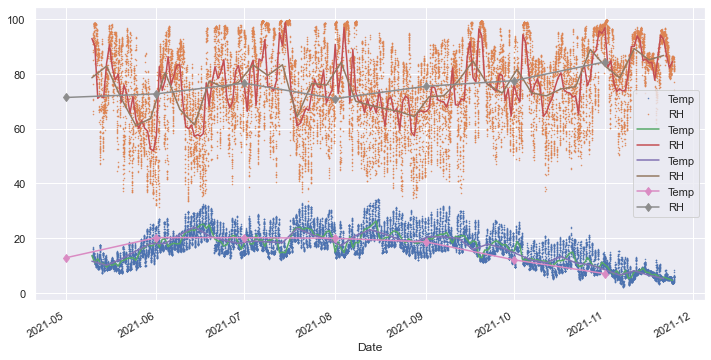

In [117]:
# Resample for averages 

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
df['Lavaux_003'].plot(ax=ax,label='Raw', linestyle='None', marker='.', markersize=1)
df['Lavaux_003'].resample('D').mean().plot(ax=ax,label='Daily')
df['Lavaux_003'].resample('5D').mean().plot(ax=ax,label='5 Day')
df['Lavaux_003'].resample('MS').mean().plot(ax=ax,label='Monthly',marker='d') #MS=Month Start
plt.legend();

## Check out patterns in time 

In [122]:
df['hour'] = df.index.hour
df['month'] = df.index.month
df['yearday'] = df.index.dayofyear

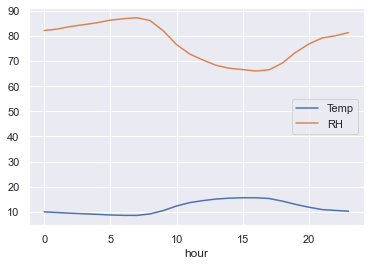

In [124]:
hourly_sst = df.Lavaux_001.groupby(df.hour).mean()
hourly_sst.plot();

In [125]:
# Quantile Function Definitions
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.75)

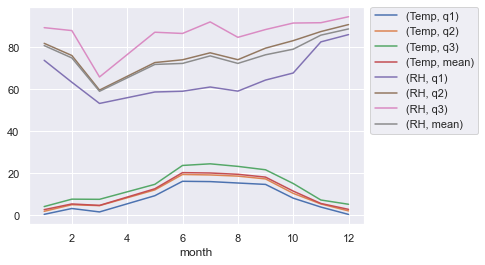

In [127]:
## Annual Cycle by Month

# Calculate the average
monthly_sst = df.Lavaux_001.groupby(df.month).agg([q1, q2, q3, np.mean])

# Quick Plot
monthly_sst.plot()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [128]:
# Monthly climatology
monthly_climatology = df.groupby(df.index.month).mean()
monthly_climatology

Lavaux_003            Lavaux_017            Lavaux_016             \
           Temp         RH       Temp         RH       Temp         RH   
Date                                                                     
1           NaN        NaN   2.644866  81.267468   3.224675  80.403968   
2           NaN        NaN   5.411900  75.897484   5.933321  74.865830   
3           NaN        NaN   4.523288  60.981294   5.218090  59.848401   
5     12.824148  71.436048  12.490017  73.674215  13.130354  71.370006   
6     20.224639  72.751759  19.993061  74.665433  20.419072  72.845389   
7     20.206796  76.657290  19.752423  78.543707  20.185251  77.136352   
8     19.978198  71.020687  19.540624  72.441751  19.849437  72.672613   
9     18.650034  75.544696  18.167467  76.477579  18.396860  76.953507   
10    12.087130  77.591757  11.545993  79.094050  11.918626  79.449867   
11     7.056318  84.442769   5.515801  86.802690   6.209621  84.922921   
12          NaN        NaN   2.707382  90.014772   3.390647  88.035684   

     Lavaux_002            Lavaux_028             ... Lavaux_019 Lavaux_025  \
           Temp         RH       Temp         RH  ...         RH       Temp   
Date                                              ...                         
1      3.781540  78.662997   3.774239  79.447007  ...  79.339685   2.617129   
2      6.318859  73.694098   6.315317  74.490103  ...  74.207457   5.399463   
3      5.571780  59.990774   5.631113  60.419475  ...  60.074870   4.463514   
5     13.278375  71.453287  13.494423  71.771679  ...  71.583410  12.550631   
6     20.556858  73.395044  20.717806  72.682124  ...  72.705779  20.076294   
7     21.265215  88.676524  20.650973  75.322483  ...  75.459726  19.877902   
8     20.303962  70.642487  20.293652  70.292402  ...  70.018085  19.519117   
9     18.921871  75.304571  18.847764  75.692654  ...  75.232878  18.180986   
10    12.603136  75.973190  12.417509  76.981655  ...  76.870663  11.437493   
11     6.962908  81.311729   6.997087  81.894043  ...  82.068133   5.545854   
12     3.972977  85.580489   4.013218  86.211702  ...  86.154609   2.768672   

                Lavaux_032            Lavaux_026                  hour month  \
             RH       Temp         RH       Temp         RH                    
Date                                                                           
1     80.497780   2.598352  80.057426   2.630095  80.097171  11.500000   1.0   
2     74.825539   5.311490  73.880716   5.391150  74.795141  11.500000   2.0   
3     60.072463   4.622028  58.583983   4.518989  59.985571  11.118644   3.0   
5     71.816579  12.282237  71.445056  12.564596  71.511846  11.620855   5.0   
6     72.829796  19.816803  72.181022  20.153849  72.058406  11.500000   6.0   
7     76.558864  19.616141  75.305730  20.042027  75.738095  11.500000   7.0   
8     70.823797  19.195098  71.293614  19.735606  70.333966  11.500000   8.0   
9     74.871367  17.870229  75.617990  18.366921  74.401019  11.500000   9.0   
10    78.231446  11.383672  77.809488  11.651429  77.423671  11.500000  10.0   
11    85.641988   5.300596  85.844774   5.538088  85.231718  11.417836  11.0   
12    88.898485   2.765704  87.643949   2.697668  88.597237  11.500000  12.0   

         yearday  
                  
Date              
1      16.000000  
2      45.500000  
3      63.203390  
5     140.656415  
6     166.500000  
7     197.000000  
8     228.000000  
9     258.500000  
10    289.000000  
11    317.268373  
12    350.000000  

[11 rows x 49 columns]

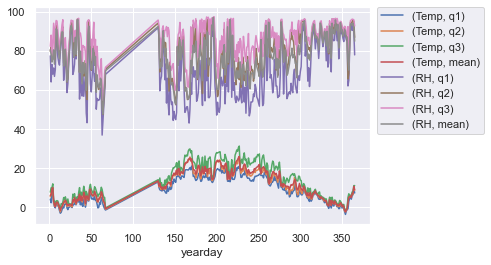

In [130]:
## Annual Cycle by Day
# Calculate the average
daily_sst = df.Lavaux_001.groupby(df.yearday).agg([q1, q2, q3, np.mean])

# Quick Plot
daily_sst.plot()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [131]:
a = df.groupby([df.index.year,df.index.month]).mean()
a

Lavaux_003            Lavaux_017            Lavaux_016             \
                Temp         RH       Temp         RH       Temp         RH   
Date Date                                                                     
2021 5     12.824148  71.436048  12.490017  73.674215  13.130354  71.370006   
     6     20.224639  72.751759  19.993061  74.665433  20.419072  72.845389   
     7     20.206796  76.657290  19.752423  78.543707  20.185251  77.136352   
     8     19.978198  71.020687  19.540624  72.441751  19.849437  72.672613   
     9     18.650034  75.544696  18.167467  76.477579  18.396860  76.953507   
     10    12.087130  77.591757  11.545993  79.094050  11.918626  79.449867   
     11     7.056318  84.442769   5.515801  86.802690   6.209621  84.922921   
     12          NaN        NaN   2.707382  90.014772   3.390647  88.035684   
2022 1           NaN        NaN   2.644866  81.267468   3.224675  80.403968   
     2           NaN        NaN   5.411900  75.897484   5.933321  74.865830   
     3           NaN        NaN   4.523288  60.981294   5.218090  59.848401   

          Lavaux_002            Lavaux_028             ... Lavaux_019  \
                Temp         RH       Temp         RH  ...         RH   
Date Date                                              ...              
2021 5     13.278375  71.453287  13.494423  71.771679  ...  71.583410   
     6     20.556858  73.395044  20.717806  72.682124  ...  72.705779   
     7     21.265215  88.676524  20.650973  75.322483  ...  75.459726   
     8     20.303962  70.642487  20.293652  70.292402  ...  70.018085   
     9     18.921871  75.304571  18.847764  75.692654  ...  75.232878   
     10    12.603136  75.973190  12.417509  76.981655  ...  76.870663   
     11     6.962908  81.311729   6.997087  81.894043  ...  82.068133   
     12     3.972977  85.580489   4.013218  86.211702  ...  86.154609   
2022 1      3.781540  78.662997   3.774239  79.447007  ...  79.339685   
     2      6.318859  73.694098   6.315317  74.490103  ...  74.207457   
     3      5.571780  59.990774   5.631113  60.419475  ...  60.074870   

          Lavaux_025            Lavaux_032            Lavaux_026             \
                Temp         RH       Temp         RH       Temp         RH   
Date Date                                                                     
2021 5     12.550631  71.816579  12.282237  71.445056  12.564596  71.511846   
     6     20.076294  72.829796  19.816803  72.181022  20.153849  72.058406   
     7     19.877902  76.558864  19.616141  75.305730  20.042027  75.738095   
     8     19.519117  70.823797  19.195098  71.293614  19.735606  70.333966   
     9     18.180986  74.871367  17.870229  75.617990  18.366921  74.401019   
     10    11.437493  78.231446  11.383672  77.809488  11.651429  77.423671   
     11     5.545854  85.641988   5.300596  85.844774   5.538088  85.231718   
     12     2.768672  88.898485   2.765704  87.643949   2.697668  88.597237   
2022 1      2.617129  80.497780   2.598352  80.057426   2.630095  80.097171   
     2      5.399463  74.825539   5.311490  73.880716   5.391150  74.795141   
     3      4.463514  60.072463   4.622028  58.583983   4.518989  59.985571   

                hour month     yearday  
                                        
Date Date                               
2021 5     11.620855   5.0  140.656415  
     6     11.500000   6.0  166.500000  
     7     11.500000   7.0  197.000000  
     8     11.500000   8.0  228.000000  
     9     11.500000   9.0  258.500000  
     10    11.500000  10.0  289.000000  
     11    11.417836  11.0  317.268373  
     12    11.500000  12.0  350.000000  
2022 1     11.500000   1.0   16.000000  
     2     11.500000   2.0   45.500000  
     3     11.118644   3.0   63.203390  

[11 rows x 49 columns]

In [133]:
sns.boxplot(data = df, x=df.index.year, y='Lavaux_001');

NotImplementedError: Index._join_level on non-unique index is not implemented

trying to group! 

In [81]:
df_temp.reset_index(drop=False, inplace=True)

In [74]:
df_temp.groupby(pd.Grouper(key='Date', freq='H')).mean()

/Users/lfloerl/miniconda3/envs/qiime2-2021.8/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Lavaux_003,Lavaux_017,Lavaux_016,Lavaux_002,Lavaux_028,Lavaux_001,Lavaux_015,Lavaux_029,Lavaux_004,Lavaux_006,...,Lavaux_009,Lavaux_020,Lavaux_008,Lavaux_030,Lavaux_024,Lavaux_018,Lavaux_019,Lavaux_025,Lavaux_032,Lavaux_026
,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,...,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp,Temp
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-10 07:00:00,16.93900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-10 08:00:00,15.97425,15.461,16.177,16.892,16.749,15.199,16.630,16.773,16.201,16.677,...,16.796,15.485,15.652,16.439,15.724,16.844,16.892,15.605,15.294,15.485
2021-05-10 09:00:00,14.69025,14.409,14.864,15.438,15.557,14.290,15.438,15.127,14.649,15.127,...,15.461,14.266,14.505,15.127,14.433,15.199,15.509,14.553,14.050,14.361
2021-05-10 10:00:00,13.85800,13.401,13.930,14.170,14.314,13.473,14.194,13.978,13.882,13.882,...,14.314,13.497,13.522,14.026,13.497,14.122,14.314,13.546,13.209,13.546
2021-05-10 11:00:00,13.91800,13.425,14.122,13.858,14.026,13.618,13.906,14.050,14.026,13.978,...,14.026,13.618,13.642,14.050,13.738,14.146,14.122,13.618,13.329,13.618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 04:00:00,NaN,-1.556,-0.395,0.550,0.550,-0.930,0.467,0.079,0.024,0.051,...,0.605,-1.527,-1.929,0.107,-0.845,0.246,0.577,-1.413,-0.986,-1.470
2022-03-08 05:00:00,NaN,-1.958,-0.789,0.495,0.384,-1.128,0.577,-0.116,-0.227,-0.227,...,0.439,-1.929,-2.189,-0.311,-1.185,0.051,0.522,-1.814,-1.270,-1.871


### Temperature dataframe 

In [12]:
dfs_temp = [pd.read_csv(f, skiprows=1, usecols=[0,1], index_col=0) for f in all_files]

#rename the columns of all dataframes 
for df in dfs_temp:
    df = df.rename_axis('Date', inplace=True)
    #df.columns = [names]    

df_temp = pd.concat(dfs_temp, axis=1)
df_temp.columns = [names]

df_temp

,Lavaux_003,Lavaux_017,Lavaux_016,Lavaux_002,Lavaux_028,Lavaux_001,Lavaux_015,Lavaux_029,Lavaux_004,Lavaux_006,...,Lavaux_009,Lavaux_020,Lavaux_008,Lavaux_030,Lavaux_024,Lavaux_018,Lavaux_019,Lavaux_025,Lavaux_032,Lavaux_026
Date,,,,,,,,,,,,,,,,,,,,,
1,04/12/2021 11:00:00 AM,04/12/2021 11:00:00 AM,04/12/2021 11:00:00 AM,04/12/2021 11:00:00 AM,04/12/2021 12:00:00 PM,04/12/2021 11:00:00 AM,04/12/2021 11:00:00 AM,04/12/2021 12:00:00 PM,04/12/2021 11:00:00 AM,04/12/2021 11:00:00 AM,...,04/12/2021 11:00:00 AM,04/12/2021 12:00:00 PM,04/12/2021 11:00:00 AM,04/12/2021 12:00:00 PM,04/12/2021 12:00:00 PM,04/12/2021 12:00:00 PM,04/12/2021 12:00:00 PM,04/12/2021 12:00:00 PM,04/12/2021 12:00:00 PM,04/12/2021 12:00:00 PM
2,04/12/2021 11:15:00 AM,04/12/2021 12:00:00 PM,04/12/2021 12:00:00 PM,04/12/2021 12:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 12:00:00 PM,04/12/2021 12:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 12:00:00 PM,04/12/2021 12:00:00 PM,...,04/12/2021 12:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 12:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 01:00:00 PM
3,04/12/2021 11:30:00 AM,04/12/2021 01:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 01:00:00 PM,...,04/12/2021 01:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 01:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 02:00:00 PM
4,04/12/2021 11:45:00 AM,04/12/2021 02:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 02:00:00 PM,...,04/12/2021 02:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 02:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 03:00:00 PM
5,04/12/2021 12:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 04:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 04:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 03:00:00 PM,...,04/12/2021 03:00:00 PM,04/12/2021 04:00:00 PM,04/12/2021 03:00:00 PM,04/12/2021 04:00:00 PM,04/12/2021 04:00:00 PM,04/12/2021 04:00:00 PM,04/12/2021 04:00:00 PM,04/12/2021 04:00:00 PM,04/12/2021 04:00:00 PM,04/12/2021 04:00:00 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21710,11/24/2021 02:15:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21711,11/24/2021 02:30:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21712,11/24/2021 02:45:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# set the time frame
df_temp.index = pd.to_datetime(df_temp.index)
df_temp = df_temp[(df_temp.index > '2021-05-10 07:30:00') & (df_temp.index < '2022-03-08 09:00:00')]

## TESTING

In [5]:
dfs_temp = [pd.read_csv(f, skiprows=1, usecols=[1,2]) for f in all_files]
dfs_temp[3]

,"Date Time, GMT+02:00","Temp, °C (LGR S/N: 10646673, SEN S/N: 10646673)"
0,04/12/2021 11:00:00 AM,18.271
1,04/12/2021 12:00:00 PM,19.674
2,04/12/2021 01:00:00 PM,20.627
3,04/12/2021 02:00:00 PM,21.246
4,04/12/2021 03:00:00 PM,19.651
...,...,...
7921,03/08/2022 12:00:00 PM,4.818
7922,03/08/2022 01:00:00 PM,6.204
7923,03/08/2022 01:44:47 PM,NaN
7924,03/08/2022 01:44:58 PM,NaN


In [6]:
# why is the to datetime not working? 
for df in dfs_temp:
    df = df.rename(columns={df.columns[0]:'Date', df.columns[1]:'Temp'}, inplace=True)
    # df_test['Date'] = pd.to_datetime(df_test['Date'])
    
dfs_temp[0].head()

,Date,Temp
0,04/12/2021 11:00:00 AM,18.652
1,04/12/2021 11:15:00 AM,19.056
2,04/12/2021 11:30:00 AM,19.413
3,04/12/2021 11:45:00 AM,19.698
4,04/12/2021 12:00:00 PM,19.984


## Test run with Sensor 03 
which sampled every 15 min

In [7]:
df_test = dfs_temp[0]
df_test.head()

,Date,Temp
0,04/12/2021 11:00:00 AM,18.652
1,04/12/2021 11:15:00 AM,19.056
2,04/12/2021 11:30:00 AM,19.413
3,04/12/2021 11:45:00 AM,19.698
4,04/12/2021 12:00:00 PM,19.984


In [8]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test.head()

,Date,Temp
0,2021-04-12 11:00:00,18.652
1,2021-04-12 11:15:00,19.056
2,2021-04-12 11:30:00,19.413
3,2021-04-12 11:45:00,19.698
4,2021-04-12 12:00:00,19.984


In [ ]:
# taking the mean over an hour -> sets the Date to INDEX 
# df_test = df_test.set_index('Date').resample('60min').mean()
# df_test.head()

In [ ]:
# applying the groupby function on df
# df_test.groupby(pd.Grouper(key='Date', axis=0, freq='H')).mean()

In [ ]:

# make a new column with the mean temperature? 
df_test['Temp_hour'] = df_test.groupby(pd.Grouper(key='Date', axis=0, freq='H')).mean()
df_test.head()
# df.groupby(df.index.hour)[['download Mb/s', 'upload Mb/s']].mean()
# df['Data4'] = df['Data3'].groupby(df['Date']).transform('sum')


<AxesSubplot:xlabel='Date', ylabel='Temp'>

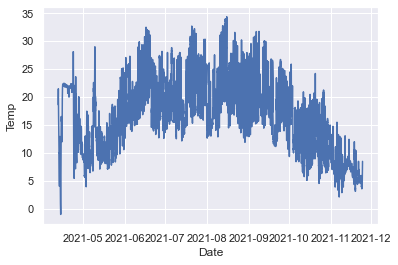

In [9]:
sns.lineplot(data=df_test, x=df_test.columns[0] , y=df_test.columns[1])

## Matplotlyb

In [ ]:
dfs_temp[0]

In [ ]:
def plot_df(df_temp, x, y, title="", xlabel='Date', ylabel='Temperature', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df_temp, x=df_temp.index, y=df_temp.Lavaux_017, title='Lavaux_001')    

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(80, 30), dpi=300)

fig, axs = plt.subplots(23)
fig.suptitle('All Plots for temperature')

for i,names in enumerate(names):
    axs[i].plot(df_temp.index, df_temp[names])

#axs[1].plot(df_temp.index, df_temp.Lavaux_001)
#axs[0].plot(df_temp.index, df_temp.Lavaux_003)

## Seaborn?

In [ ]:
# reset index to make a column
df_temp.reset_index(inplace=True)
df_temp = df_temp.rename(columns = {'index':'Date'})

In [ ]:
sns.lineplot(data=df_temp, x='Date' , y='Lavaux_002')
# wtf is seaborns problem with the index?? 

In [ ]:
names

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=8)

for i, ax in zip(range(names_int), axes.flat):
    sns.distplot(df_temp[i,0,0,0], hist=False, ax=ax)
plt.show()

# Resources 

https://datalab.marine.rutgers.edu/2020/11/introduction-to-python-data-analysis/
